# Threatened Species of National Environmental Significance

Data provided by the Department of the Environment and Energy

The dataset contains information about species of national environmental significance including both plants and animals as listed in the Environment Protections and Biodiversity Conervation Act 1999 (EPBC Act). It also draws information from the Species Profile and Threats Database (SPRAT) on a regular basis to ensure up to date information.

PHOEBE HILL (Phoebeh107) 
z5161626

https://github.com/Phoebeh107/OpenDataProject

In [3]:
import os
import shapely
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gp
import fiona

ModuleNotFoundError: No module named 'geopandas'

In [13]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10) #puts the graphs into the notebook instead of creating files
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

These are lists I need throughout the project and have called on in my further code. This inclues list of locations and EPBC Threatened species list status as well as the lists of HEX colour codes to manually colour my plots.

In [14]:
state_list = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA', 'ACI', 'CKI', 'CI', 'CSI', 'JBT', 'NFI', 'HMI', 'AAT', 'CMA']
status_list = ['Vulnerable' , 'Endangered', 'Critically Endangered', 'Extinct', 'Conservation Dependent', 'Extinct in the wild']
#Colours
state_colours = []
status_colours = []


In [15]:
if os.path.isfile("endangered_species.csv"):
    filepath = "endangered_species.csv"
    print("loading from file")
else:
    filepath = "find a url address later"
    print("loading from the internet") ####still to do!!!!!!!

endangered_species = pd.read_csv(filepath)
print("done")

loading from file
done


In [16]:
endangered_species.head()

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
0,Neophoca cinerea,"Australian Sea-lion, Australian Sea Lion",-,Vulnerable,-,-,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Otariidae,Neophoca,cinerea,-,-,"(Peron,1816)",-
1,Mirounga leonina,Southern Elephant Seal,-,Vulnerable,-,-,-,-,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Phocidae,Mirounga,leonina,-,-,"(Linnaeus,1758)",-
2,Balaenoptera borealis,Sei Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Balaenopteridae,Balaenoptera,borealis,-,-,"Lesson, 1828",-
3,Balaenoptera musculus,Blue Whale,-,Endangered,-,Yes,Yes,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Balaenopteridae,Balaenoptera,musculus,-,-,"(Linnaeus, 1758)",-
4,Balaenoptera physalus,Fin Whale,-,Vulnerable,-,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Balaenopteridae,Balaenoptera,physalus,-,-,"(Linnaeus, 1758)",-


In [17]:
endangered_species.columns

Index(['Scientific Name', 'Common Name', 'Current Scientific Name',
       'Threatened status', 'ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC',
       'WA', 'ACI', 'CKI', 'CI', 'CSI', 'JBT', 'NFI', 'HMI', 'AAT', 'CMA',
       'Listed SPRAT TaxonID', 'Current SPRAT TaxonID', 'Kingdom', 'Class',
       'Profile', 'Date extracted', 'NSL Name', 'Family', 'Genus', 'Species',
       'Infraspecific Rank', 'Infraspecies', 'Species Author',
       'Infraspecies Author'],
      dtype='object')

## STATES AND TERITORIES OF AUSTRALIA 

In the data their columns are listed under their acronym form. These are and their full title as follows:

**ACT**: Australian Capital Territory

**NSW**: New South Wales (including Lord Howe island) (state)

**NT**: Northern Territory

**QLD**: Queensland (state)

**SA**: South Australia (state)

**TAS**: Tasmainia (including Macquarie Island) (state) 

**VIC**: Victoria (state)

**WA**: Western Australia (state)

**ACI**: Ashmore and Catier Islands (external territory)

**CKI**: Cocos (Keeling) Islands (external territory)

**CI**: Christmas Island (external territory)

**CSI**: Coral Sea Islands (external territory)

**JBT**: Jervis Bay Territory (external territory)

**NFI**: Norfolk Island (external territory)

**HMI**: Heard and McDonald Islands (external territory)

**AAT**: Australian Antarctic Territory (external territory)

**CMA**: Commonwealth Marine Area


![map of the aus territories](https://upload.wikimedia.org/wikipedia/commons/b/bb/Australia_states_and_territories_labelled.svg)

In [18]:
endangered_species.loc[0]

Scientific Name                                             Neophoca cinerea
Common Name                         Australian Sea-lion, Australian Sea Lion
Current Scientific Name                                                    -
Threatened status                                                 Vulnerable
ACT                                                                        -
NSW                                                                        -
NT                                                                         -
QLD                                                                        -
SA                                                                       Yes
TAS                                                                        -
VIC                                                                        -
WA                                                                       Yes
ACI                                                                        -

In [19]:
endangered_species["Kingdom"].value_counts()

Plantae     1356
Animalia     506
Name: Kingdom, dtype: int64

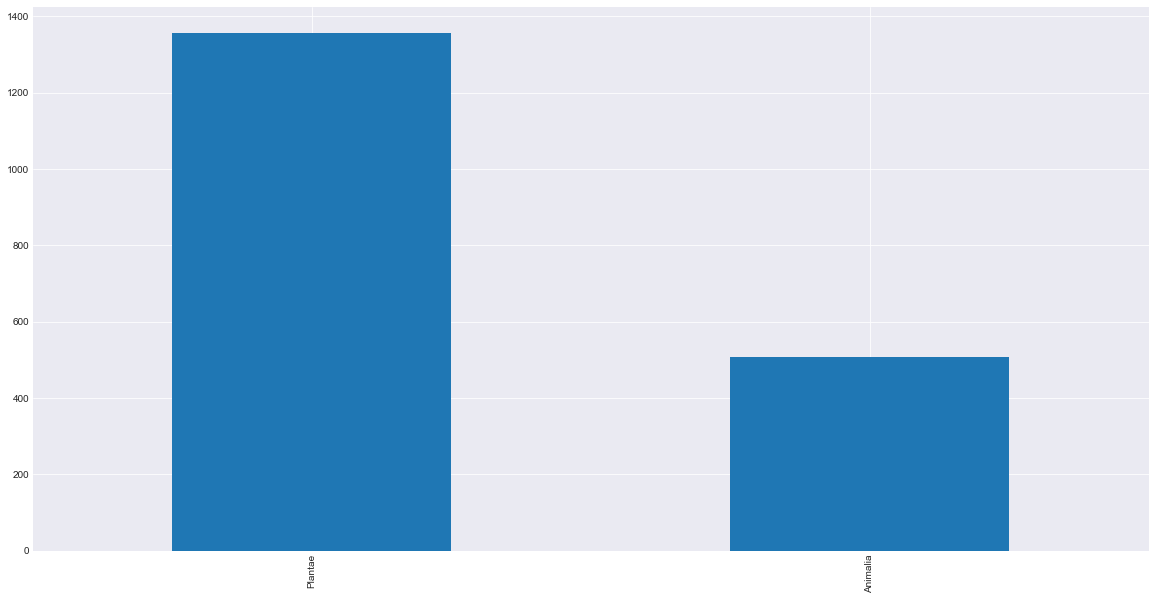

In [20]:
endangered_species["Kingdom"].value_counts().plot(kind="bar")

Vulnerable                792
Endangered                711
Critically Endangered     259
Extinct                    91
Conservation Dependent      8
Extinct in the wild         1
Name: Threatened status, dtype: int64


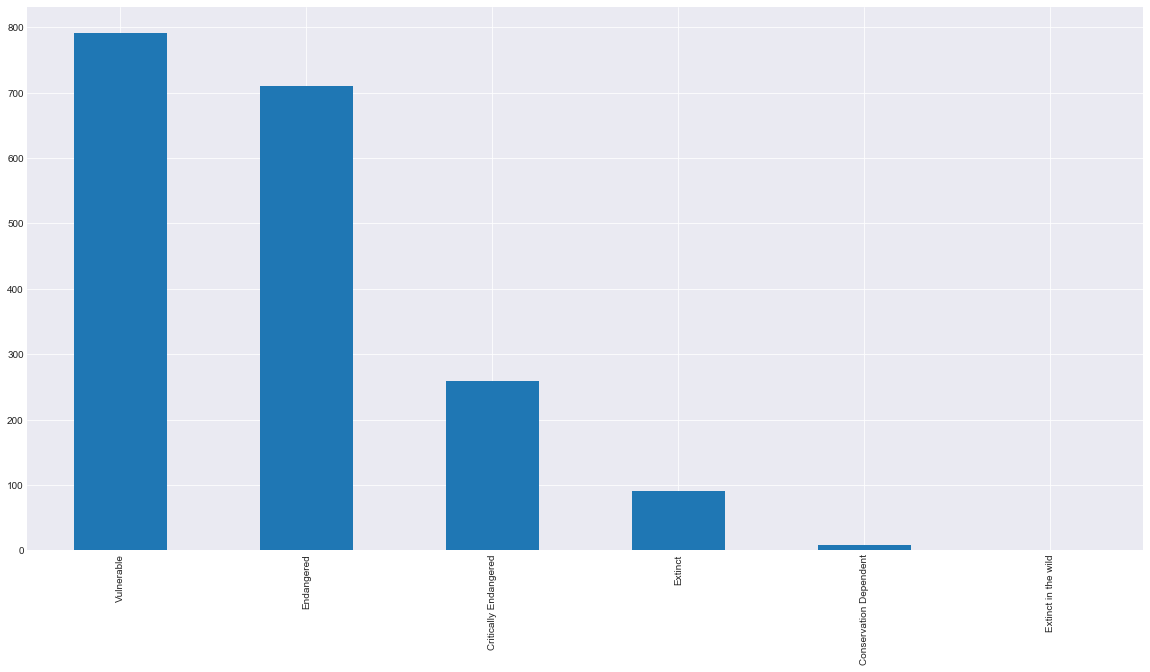

In [21]:
print(endangered_species['Threatened status'].value_counts()) 
#Add value counts to the bar graphs as well as colours and lables
endangered_species['Threatened status'].value_counts().plot(kind="bar")

In [22]:
print(endangered_species['Class'].value_counts())

Magnoliopsida              980
Liliopsida                 313
Aves                       155
Mammalia                   133
Reptilia                    63
Actinopterygii              43
Amphibia                    33
Polypodiatae                30
Insecta                     20
Gastropoda                  20
Chondrichthyes              14
Cycadatae                   14
Malacostraca                13
Lycopodopiatae              10
Pinatae                      4
Arachnida                    3
Asteroidea                   2
Oligochaeta                  2
Bivalvia                     2
Psilotatae                   2
Onychophora (no class)       1
Rhodophyceae                 1
Streptophyta (no class)      1
Bryopsida                    1
Remipedia                    1
Sarcopterygii                1
Name: Class, dtype: int64


In [23]:
endangered_species["Class"][endangered_species["Kingdom"] == 'Plantae'].value_counts()


Magnoliopsida              980
Liliopsida                 313
Polypodiatae                30
Cycadatae                   14
Lycopodopiatae              10
Pinatae                      4
Psilotatae                   2
Bryopsida                    1
Rhodophyceae                 1
Streptophyta (no class)      1
Name: Class, dtype: int64

In [24]:
endangered_species["Class"][endangered_species["Kingdom"] == 'Animalia'].value_counts()


Aves                      155
Mammalia                  133
Reptilia                   63
Actinopterygii             43
Amphibia                   33
Insecta                    20
Gastropoda                 20
Chondrichthyes             14
Malacostraca               13
Arachnida                   3
Bivalvia                    2
Oligochaeta                 2
Asteroidea                  2
Onychophora (no class)      1
Sarcopterygii               1
Remipedia                   1
Name: Class, dtype: int64

In [25]:
endangered_species[(endangered_species["NSW"] == 'Yes')&(endangered_species["ACT"] == 'Yes')] #the pipe | means 'or' and & (is obvious)

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
10,Pseudomys fumeus,"Smoky Mouse, Konoom",-,Endangered,Yes,Yes,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Muridae,Pseudomys,fumeus,-,-,"Brazenor,1934",-
31,Pteropus poliocephalus,Grey-headed Flying-fox,-,Vulnerable,Yes,Yes,-,Yes,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Pteropodidae,Pteropus,poliocephalus,-,-,"Temminck, 1825",-
37,Petrogale penicillata,Brush-tailed Rock-wallaby,-,Vulnerable,Yes,Yes,-,Yes,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Macropodidae,Petrogale,penicillata,-,-,"(Gray,1827)",-
44,Petauroides volans,Greater Glider,-,Vulnerable,Yes,Yes,-,Yes,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Petauridae,Petauroides,volans,-,-,"(Kerr, 1792)",-
68,Grantiella picta,Painted Honeyeater,-,Vulnerable,Yes,Yes,Yes,Yes,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Meliphagidae,Grantiella,picta,-,-,"(Gould,1838)",-
79,Polytelis swainsonii,Superb Parrot,-,Vulnerable,Yes,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Psittacidae,Polytelis,swainsonii,-,-,"(Desmarest,1826)",-
80,Lathamus discolor,Swift Parrot,-,Critically Endangered,Yes,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Psittacidae,Lathamus,discolor,-,-,"(Shaw, 1790)",-
94,Botaurus poiciloptilus,Australasian Bittern,-,Endangered,Yes,Yes,-,Yes,Yes,Yes,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Ardeidae,Botaurus,poiciloptilus,-,-,"(Wagler, 1827)",-
115,Delma impar,Striped Legless Lizard,-,Vulnerable,Yes,Yes,-,-,Yes,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Pygopodidae,Delma,impar,-,-,"(Fischer,1882)",-
117,Aprasia parapulchella,"Pink-tailed Worm-lizard, Pink-tailed Legless L...",-,Vulnerable,Yes,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Pygopodidae,Aprasia,parapulchella,-,-,"Kluge,1974",-


In [26]:
endangered_species[(endangered_species["NSW"] == 'Yes') & (endangered_species["Threatened status"] == 'Extinct') & (endangered_species["Class"] == 'Aves')]

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
78,Psephotus pulcherrimus,Paradise Parrot,-,Extinct,-,Yes,-,Yes,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Psittacidae,Psephotus,pulcherrimus,-,-,"(Gould, 1845)",-
855,Gerygone insularis,"Lord Howe Gerygone, Lord Howe Warbler",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Pardalotidae,Gerygone,insularis,-,-,"Ramsey, 1879",-
857,Aplonis fusca,Tasman Starling,-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Sturnidae,Aplonis,fusca,-,-,"Gould, 1836",-
859,Zosterops strenuus,Robust White-eye,-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Zosteropidae,Zosterops,strenuus,-,-,"Gould, 1855",-
877,Columba vitiensis godmanae,"Lord Howe White-throated Pigeon, White-throate...",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Columbidae,Columba,vitiensis,-,godmanae,-,"(Mathews, 1915)"
891,Cyanoramphus novaezelandiae subflavescens,"Lord Howe Tasman Parakeet, Red-crowned Parakee...",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Psittacidae,Cyanoramphus,novaezelandiae,-,subflavescens,-,"Salvadori, 1891"
892,Ninox novaeseelandiae albaria,"Lord Howe Southern Boobook, Lord Howe Boobook Owl",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Strigidae,Ninox,novaeseelandiae,-,albaria,-,"(Ramsey, 1888)"
1361,Porphyrio albus,White Gallinule,-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Rallidae,Porphyrio,albus,-,-,"(Shaw, 1790)",-
1446,Rhipidura fuliginosa cervina,"Lord Howe Grey Fantail, Grey Fantail (Lord How...",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Muscicapidae,Rhipidura,fuliginosa,-,cervina,-,"Ramsay, 1879"
1450,Turdus poliocephalus vinitinctus,"Lord Howe Thrush, Vinous-tinted Thrush",-,Extinct,-,Yes,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Muscicapidae,Turdus,poliocephalus,-,vinitinctus,-,"(Gould, 1855)"


In [27]:
endangered_species[(endangered_species["HMI"] == 'Yes') & (endangered_species["NSW"] != 'Yes') & (endangered_species["SA"] != 'Yes') & (endangered_species["TAS"] != 'Yes')]

,Scientific Name,Common Name,Current Scientific Name,Threatened status,ACT,NSW,NT,QLD,SA,TAS,...,Profile,Date extracted,NSL Name,Family,Genus,Species,Infraspecific Rank,Infraspecies,Species Author,Infraspecies Author
1154,Sterna vittata vittata,Antarctic Tern (Indian Ocean),-,Vulnerable,-,-,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Laridae,Sterna,vittata,-,vittata,"Gmelin, 1789",-
1431,Leucocarbo atriceps nivalis,"Imperial Shag (Heard Island), Heard Shag",-,Vulnerable,-,-,-,-,-,-,...,http://www.environment.gov.au/cgi-bin/sprat/pu...,2019-Jul-03,-,Phalacrocoracidae,Leucocarbo,atriceps,-,nivalis,"Falla, 1937",-


In [28]:
state_list = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA', 'ACI', 'CKI', 'CI', 'CSI', 'JBT', 'NFI', 'HMI', 'AAT', 'CMA']
status_list = ['Vulnerable' , 'Endangered', 'Critically Endangered', 'Extinct', 'Conservation Dependent', 'Extinct in the wild']

def state_status_counter(state):
    state_status = (endangered_species[endangered_species[state] == 'Yes']).reset_index()
    state_status ['Threatened status'] = endangered_species["Threatened status"]
    status_counts = state_status["Threatened status"].value_counts().reset_index().rename(columns = {'Threatened status':(state + 'Count'),'index':'Threatened Status'})
    return status_counts

for x in range(0, len(state_list)):
    print(state_status_counter(state_list[x]))
    
    

       Threatened Status  ACTCount
0             Vulnerable        21
1                Extinct        12
2             Endangered        10
3  Critically Endangered         2
       Threatened Status  NSWCount
0             Vulnerable       308
1             Endangered       196
2  Critically Endangered        42
3                Extinct        40
       Threatened Status  NTCount
0             Vulnerable       57
1             Endangered       40
2                Extinct       17
3  Critically Endangered       15
       Threatened Status  QLDCount
0             Vulnerable       258
1             Endangered       172
2  Critically Endangered        39
3                Extinct        34
       Threatened Status  SACount
0             Vulnerable      131
1             Endangered       91
2  Critically Endangered       27
3                Extinct       25
       Threatened Status  TASCount
0             Vulnerable       104
1             Endangered        71
2                Extinct      

In [29]:
plt.style.use('seaborn-darkgrid')
def status_states():
    for x in range(0, len(state_list)):
        (state_status_counter(state_list[x]))
    fig, ax = plt.subplots()
    plt.bar(x=status_counts["Threatened Status"], height=status_counts['Count'], width=1, color='#A5E9B6', alpha=1)

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Threatened Status per State/Territory\n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Threatened Status', fontsize=22,family = 'monospace')
    plt.ylabel('Count ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')
    
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+10, i.get_y()+.1, str(i.get_width()), fontsize=19,\
                color='#A5E9B6')

plt.show()

In [61]:
def statesVstatus():
    state_status = (endangered_species[endangered_species['NSW'] == 'Yes']).reset_index()
    state_status ['Threatened status'] = endangered_species["Threatened status"]
    status_counts = state_status["Threatened status"].value_counts().reset_index().rename(columns = {'Threatened status':('NSW' + 'Count'),'index':'Threatened Status'})
    status_counts

    fig, ax = plt.subplots()
    plt.bar(x=status_counts["Threatened Status"], height=status_counts["NSWCount"], color='#A5E9B6')

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Threatened Status numbers in NSW\n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Threatened Status', fontsize=22 ,family = 'monospace')
    plt.ylabel('Number of Species', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    return plt.show()

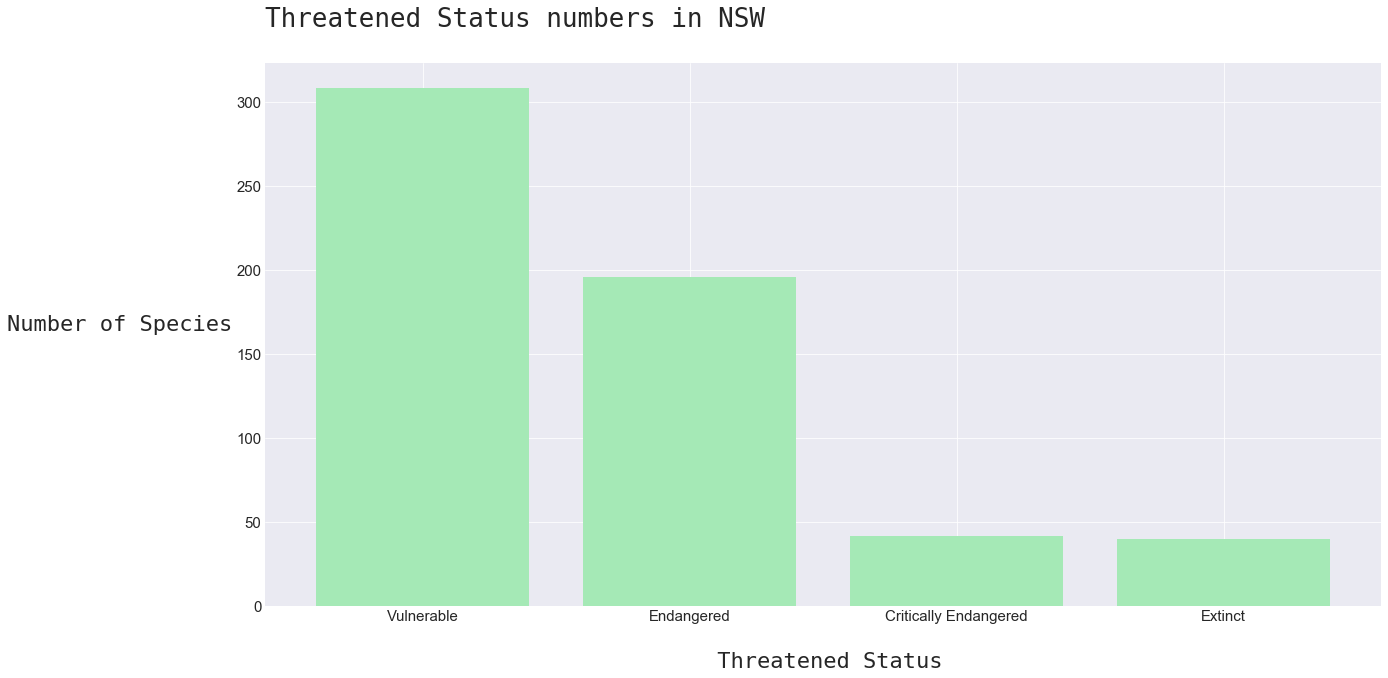

In [62]:
statesVstatus()

In [53]:
state_list = ['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA', 'ACI', 'CKI', 'CI', 'CSI', 'JBT', 'NFI', 'HMI', 'AAT', 'CMA']
status_list = ['Vulnerable' , 'Endangered', 'Critically Endangered', 'Extinct', 'Conservation Dependent', 'Extinct in the wild']
state_counts = {}
def state_status_counter(state):
    state_status = (endangered_species[endangered_species[state] == 'Yes']).reset_index()
    state_status ['Threatened status'] = endangered_species["Threatened status"]
    status_counts = state_status["Threatened status"].value_counts().reset_index().rename(columns = {'Threatened status':(state + 'Count'),'index':'Threatened Status'})
    state_counts[state] = {}
    return state_counts and status_counts

for x in range(0, len(state_list)):
    print(state_status_counter(state_list[x]))
    
    
    
def statesVstatus():
    state_status = (endangered_species[endangered_species['NSW'] == 'Yes']).reset_index()
    state_status ['Threatened status'] = endangered_species["Threatened status"]
    status_counts = state_status["Threatened status"].value_counts().reset_index().rename(columns = {'Threatened status':('NSW' + 'Count'),'index':'Threatened Status'})
    status_counts

    fig, ax = plt.subplots()
    plt.bar(x=status_counts["Threatened Status"], height=status_counts["NSWCount"], color='#A5E9B6')

    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Threatened Status per State/Territory NSW\n",fontsize=26,  family = 'monospace', loc='left')
    plt.xlabel('\n Threatened Status', fontsize=22 ,family = 'monospace')
    plt.ylabel('Count ', fontsize=22, rotation='horizontal', ha='right',family = 'monospace')

    return plt.show()

       Threatened Status  ACTCount
0             Vulnerable        21
1                Extinct        12
2             Endangered        10
3  Critically Endangered         2
       Threatened Status  NSWCount
0             Vulnerable       308
1             Endangered       196
2  Critically Endangered        42
3                Extinct        40
       Threatened Status  NTCount
0             Vulnerable       57
1             Endangered       40
2                Extinct       17
3  Critically Endangered       15
       Threatened Status  QLDCount
0             Vulnerable       258
1             Endangered       172
2  Critically Endangered        39
3                Extinct        34
       Threatened Status  SACount
0             Vulnerable      131
1             Endangered       91
2  Critically Endangered       27
3                Extinct       25
       Threatened Status  TASCount
0             Vulnerable       104
1             Endangered        71
2                Extinct      

In [33]:
def state_counter(state,status):
    state_status = (endangered_species[endangered_species[state] == 'Yes']).reset_index()
    state_status ['Threatened status'] = endangered_species["Threatened status"]
    status_counts = {state: {status:(state_status["Threatened status"] == status).value_counts()}

#for y in range (0, len(status_list))                     

# for x in range(0, len(state_list)):
#     for y in range (0, len(status_list)):
#         state_counter(state_list[x],status_list[y])

SyntaxError: unexpected EOF while parsing (<ipython-input-33-75f9f9540cd0>, line 10)

In [60]:
for x in range(0, len(state_list)):
    state_list[x] = state_now
    for y in range (0, len(status_list)):
        status_list[y] = status_now
        endangered_species[(endangered_species[state_now] == 'Yes') & (endangered_species["Threatened Status"] == status_now)]


KeyError: None